<a href="https://colab.research.google.com/github/LazaroR-u/Thesis_Data_Analysis_CMS_CERN/blob/main/1_Comparison_Map_Functions_RPCs_CERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the currents in the RPCs of the CMS detector at CERN.

By **Lázaro R. Díaz Lievano**

**B.Sc. Physics Student, Autonomous University of Puebla.**

lazaro.raul.diaz.lievano@cern.ch

In this notebook we implement the new map function to the current data and compare it with the Mapse mapping function. Here, we used only the Mapse mapping dataframe that includes 1050/1056 chambers.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

import numpy as np

In [ ]:
def convert_dpid_name(df_data, df_mapping):

    # Take df colums to numpy array
    k = df_mapping['DPID2'].to_numpy()
    v = df_mapping['CHAMBER_NAME'].to_numpy()

    # Convert both arrays to a dict.
    dicmap =  dict(zip(k, v))

    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['Chamber_name'] = df_data['DPID'].map(dicmap)

    df_data_mapped = df_data

    return df_data_mapped

In [ ]:
def individual_wheel(wheel, voltage, df_data):

    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]

    # Filter for select the wished wheel
    df_wheel = df_data[np.where(df_data['Chamber_name'].str.find(wheel) == 0, True, False) == True]
    #just return the wheel
    return df_wheel

In [ ]:
def select_endcap(region, voltage, df_data):

    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]

    # Filter for select the wished endcap
    df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]

    '''if region == 'RE-' or region =='RE+':
        df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE+4') != 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE-4') != 0, True, False) == True]
    else:
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE+4') == 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE-4') != 0, True, False) == True]'''

    return df_endcap

In [ ]:
def filter_current_data(data_required, date):

    df_date_to_plot = data_required[np.where(data_required['DATE'].str.find(date) == 0, True, False) == True]
    df_current = df_date_to_plot['AVG_IMON']

    return df_current

In [ ]:
def plot(data_to_plot, dates_array, bins=80):
    #define an array of specific colors
    colors = np.array(['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#449166','#6d9509','#1f465e'])
    handles = []
    labels = []
    #create a figure of subplots
    fig, ax = plt.subplots()

    for i, j in enumerate(dates_array):
        #filter the data to return only entries with the desired date
        df_date_to_plot = data_to_plot[np.where(data_to_plot['DATE'].str.find(j) == 0, True, False) == True]
        df_current = df_date_to_plot['AVG_IMON']
        #if the mean current in this date is a nan then print there is not data available, else pass
        if np.isnan(round(df_current.mean(),2)):
            print(f"There is no data available for: {j}")
            continue
        #creates a mean currents histogram
        histogr = df_current.plot.hist(bins=bins, alpha=1.0, color=colors[i],  histtype='step', linewidth=2, range=(0, 20))

        handles.append(Rectangle((0,0), 1, 1, color=colors[i], ec="k"))
        labels.append(j + f"-mean: {round(df_current.mean(),2)} uA")


    # Xlabel
    ax.xaxis.set_label_coords(0.90, -0.055)
    ax.set_xlabel(r'$I(\mu A)$', fontsize = 22)

    # Ylabel
    ax.yaxis.set_label_coords(-0.09, 0.86)
    ax.set_ylabel('Entries', fontsize = 22)

    #print this objects in the plot
    plt.legend(handles, labels)

    # CMS format
    hfont = {'fontname':'italic'}
    plt.text(0.13, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure)
    plt.text(0.23, 0.89, "Preliminary", fontdict=hfont, style='italic',fontsize = 22, transform=plt.gcf().transFigure)

    plt.grid()

    ## Takes the first element column chamber name in order to save with the correct name
    # This works for W+-2 and W+-1
    name = data_to_plot['Chamber_name'].to_numpy()[1][0:3]
    # This works for
    if name[2] == '_':
        name = name[0:2]

    plt.savefig("Current_distribution_" + name +".png")

# LOAD THE DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Transform the .csv in a panda dataframe
#have to download the csv from the link of the CERN
df_data = pd.read_csv('https://raw.githubusercontent.com/LazaroR-u/Thesis_Data_Analysis_CMS_CERN/main/datasets/last_data_2023.csv')

# Mapping between dpid and chamber name
df_mapping = pd.read_csv('https://raw.githubusercontent.com/Mapse/RPC_Currents/main/RPC_Chamber_HV_Map.csv')

df_data = df_data.dropna()
df_data['DPID'] = df_data['DPID'].astype(int)

df_data_map2 = pd.read_csv('https://raw.githubusercontent.com/LazaroR-u/Thesis_Data_Analysis_CMS_CERN/main/datasets/df_last_data_2023_full_mapped.csv')

voltage =9200

df_mapping

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


In [ ]:
df_data_map2

,Unnamed: 0,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0,W+2_RB1in_S01
1,1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0,W+2_RB1in_S01
2,2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0,W+2_RB1in_S01
3,3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0,W+2_RB1in_S01
4,4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0,W+2_RB1in_S01
...,...,...,...,...,...,...,...,...
88540,88540,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2,RE-1_R2_CH18
88541,88541,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-2_R2_CH11
88542,88542,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-1_R2_CH18
88543,88543,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.30.27.000000000 PM,21-JUN-23 04.35.27.000000000 PM,9400,4.6,RE-2_R2_CH11


## MAP FUNCTION 1

In [ ]:
df_data_map1 = convert_dpid_name(df_data, df_mapping)
df_data_map1

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0,W+2_RB1in_S01
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0,W+2_RB1in_S01
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0,W+2_RB1in_S01
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0,W+2_RB1in_S01
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0,W+2_RB1in_S01
...,...,...,...,...,...,...,...
63827,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 12.31.06.000000000 PM,21-JUN-23 12.45.32.000000000 PM,8000,3.8,RE-1_R2_CH18
63828,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 12.45.44.000000000 PM,21-JUN-23 01.00.31.000000000 PM,8500,4.2,RE-1_R2_CH18
63829,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2,RE-1_R2_CH18
63830,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-1_R2_CH18


In [ ]:
df_mapping_dup = df_mapping[df_mapping["DPID2"].duplicated(keep=False)]
df_mapping_dup

,DPID2,CHAMBER_NAME
481,142824,RE+2_R3_CH02
482,142824,RE+1_R3_CH29
483,142825,RE+1_R3_CH31
484,142825,RE+1_R2_CH29
485,142826,RE+2_R3_CH03
...,...,...
1042,216670,RE+3_R2_CH33
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11


## MAP FUNCTION 2

In [ ]:
import pandas as pd

def cambia_ids_repetidos(df):
    id_count = {}

    def generar_sufijo(count):
        letras = 'abcdefghijklmnopqrstuvwxyz'
        sufijo = ''
        while count >= len(letras):
            sufijo += letras[count % len(letras)]
            count //= len(letras)
        sufijo += letras[count]
        return sufijo

    for index, row in df.iterrows():
        dpid = row['DPID2']
        if dpid in id_count:
            count = id_count[dpid]
            sufijo = generar_sufijo(count)
            id_count[dpid] += 1
            df.at[index, 'DPID2'] = f'{dpid}{sufijo}'
        else:
            id_count[dpid] = 1

    return df


df_mapping_2 = cambia_ids_repetidos(df_mapping)

df_mapping_2_dup = df_mapping_2[df_mapping_2["DPID2"].isin(df_mapping_dup["DPID2"])]
df_mapping_2_dup

import pandas as pd
# function to add the suffix a
def agregar_letra(indice):
    return f'{indice}a'

# apply the function only with the reapeted DPID
df_mapping_2['DPID2'] = df_mapping_2['DPID2'].apply(lambda x: agregar_letra(x) if x in df_mapping_2_dup['DPID2'].values else x)

# show the dataframe
df_mapping_2

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689a,RE-1_R3_CH10
1046,216689b,RE-1_R3_CH04
1047,216701a,RE-2_R2_CH11
1048,216701b,RE-1_R2_CH18


In [ ]:
df_data = df_data.drop(columns = "Chamber_name")

In [ ]:
def convert_dpid_name_2(df_data, df_mapping_2):

    # Take df colums to numpy array
    k = df_mapping_2['DPID2'].to_numpy()
    v = df_mapping_2['CHAMBER_NAME'].to_numpy()

    # Convert both arrays to a dict.
    dicmap =  dict(zip(k, v))

    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['Chamber_name'] = df_data['DPID'].map(dicmap)

    df_data_mapped = df_data

    return df_data_mapped

In [ ]:
df_data_map = pd.DataFrame(columns=df_data.columns)

for index, row in df_data.iterrows():
    dpid = row['DPID']

    if dpid in df_mapping_dup["DPID2"].values:
        nueva_fila_a = row.copy()
        nueva_fila_a['DPID'] = f'{dpid}a'
        df_data_map = df_data_map.append(nueva_fila_a, ignore_index=True)

        nueva_fila_b = row.copy()
        nueva_fila_b['DPID'] = f'{dpid}b'
        df_data_map = df_data_map.append(nueva_fila_b, ignore_index=True)
    else:
        df_data_map = df_data_map.append(row, ignore_index=True)

df_data_map

<ipython-input-14-1ace3c0d8d21>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data_map = df_data_map.append(row, ignore_index=True)
<ipython-input-14-1ace3c0d8d21>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data_map = df_data_map.append(nueva_fila_a, ignore_index=True)
<ipython-input-14-1ace3c0d8d21>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data_map = df_data_map.append(nueva_fila_b, ignore_index=True)


,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0
...,...,...,...,...,...,...
88280,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2
88281,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6
88282,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6
88283,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.30.27.000000000 PM,21-JUN-23 04.35.27.000000000 PM,9400,4.6


Note that the number of rows in the data frame increased from 68 thousand to 88
thousand. This indicates that the entries with duplicate DPIDs are now both chamber names.


In [ ]:
df_data_map2 =convert_dpid_name_2(df_data_map, df_mapping)

In [ ]:
df_data_map2

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0,W+2_RB1in_S01
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0,W+2_RB1in_S01
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0,W+2_RB1in_S01
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0,W+2_RB1in_S01
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0,W+2_RB1in_S01
...,...,...,...,...,...,...,...
88280,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2,RE-1_R2_CH18
88281,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-2_R2_CH11
88282,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-1_R2_CH18
88283,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.30.27.000000000 PM,21-JUN-23 04.35.27.000000000 PM,9400,4.6,RE-2_R2_CH11


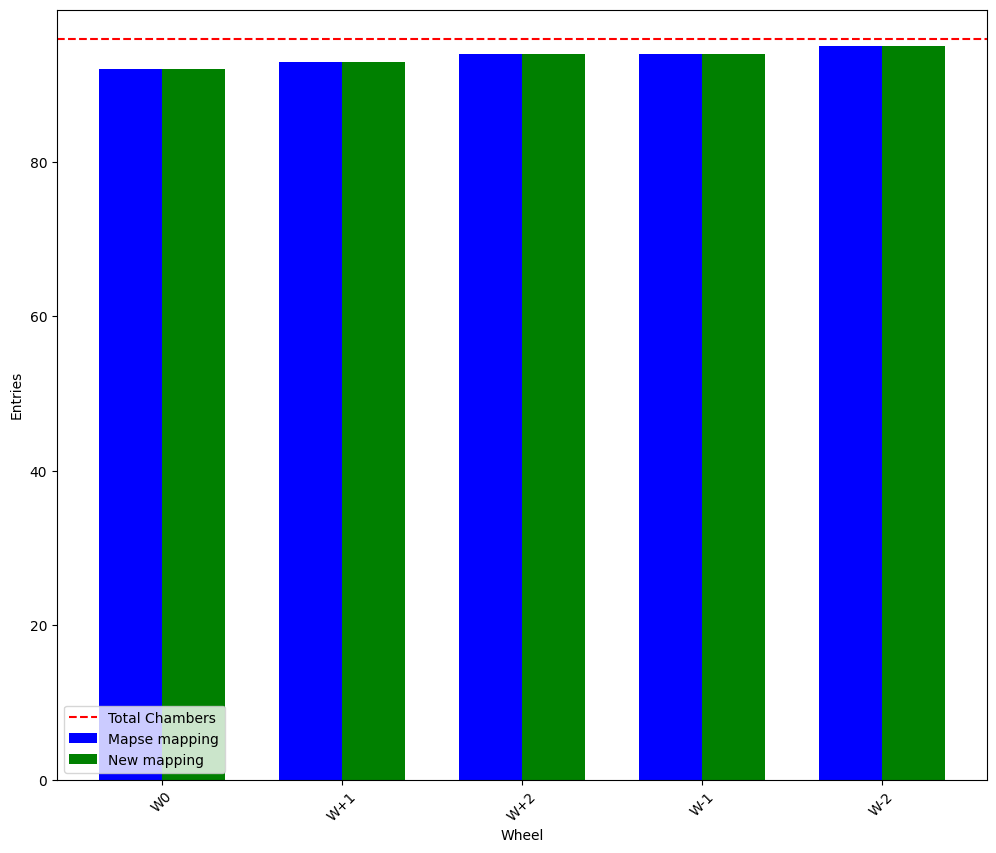

In [ ]:
n1_W_plus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W+1") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_plus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W+2") == 0, True, False) == True]["Chamber_name"].unique())
n1_W0 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W0") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_minus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W-1") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_minus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W-2") == 0, True, False) == True]["Chamber_name"].unique())


groupW1 = {"W0": n1_W0 ,"W+1" : n1_W_plus_1, "W+2":n1_W_plus_2,
         "W-1" : n1_W_minus_1, "W-2":n1_W_minus_2}

n2_W_plus_1 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W+1") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_plus_2 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W+2") == 0, True, False) == True]["Chamber_name"].unique())
n2_W0 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W0") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_minus_1 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W-1") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_minus_2 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W-2") == 0, True, False) == True]["Chamber_name"].unique())


groupW2 = {"W0": n2_W0 ,"W+1" : n2_W_plus_1, "W+2":n2_W_plus_2,
         "W-1" : n2_W_minus_1, "W-2":n2_W_minus_2}
# Etiquetas de los grupos
plt.figure(figsize=(12,10))
labels = list(groupW1.keys())
x = np.arange(len(labels))

# Altura de las barras
values1 = list(groupW1.values())
values2 = list(groupW2.values())

# Ancho de las barras
bar_width = 0.35

# Crear un gráfico de barras para comparar los dos grupos
plt.bar(x - bar_width/2, values1, bar_width, label='Mapse mapping', color='b', align='center')
plt.bar(x + bar_width/2, values2, bar_width, label='New mapping', color='g', align='center')
plt.axhline(y=96, color="r", label="Total Chambers", ls ="--")

# Etiquetas y título
plt.xlabel('Wheel')
plt.ylabel('Entries')
#plt.title('Comparación de entradas por Wheel usando el mapeo original y el nuevo')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()

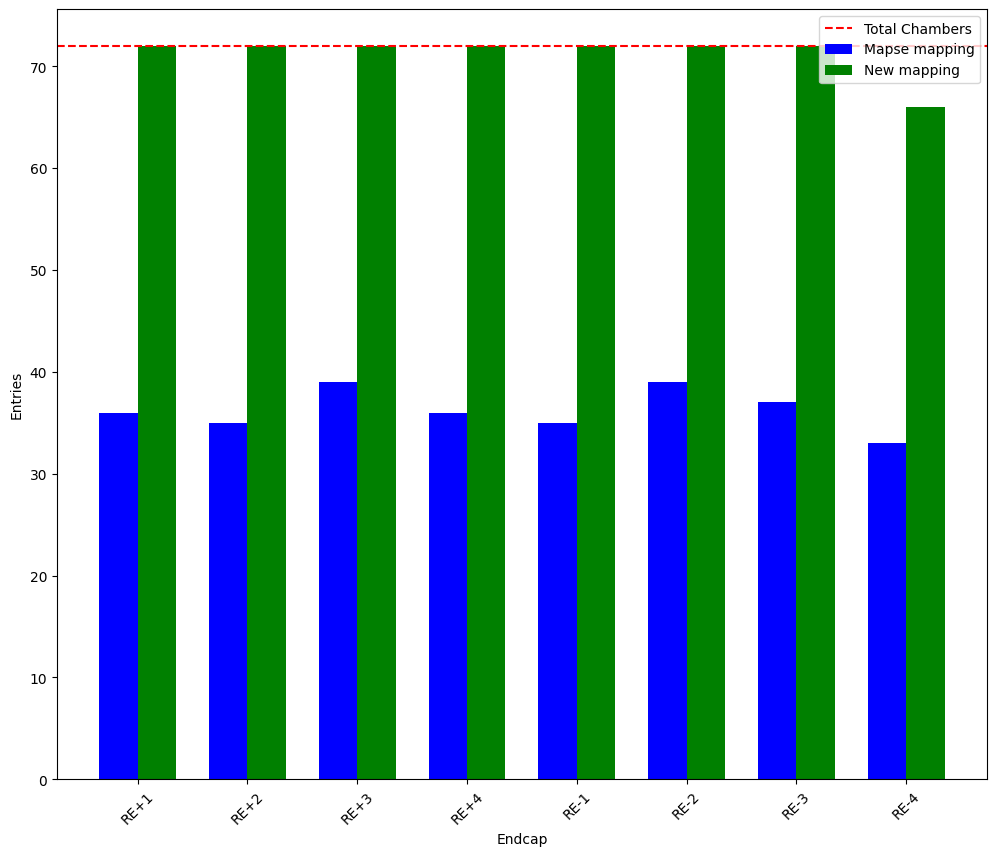

In [ ]:
n1_RE_plus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+1") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+2") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_3 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+3") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_4 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+4") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-1") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-2") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_3 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-3") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_4 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-4") == 0, True, False) == True]["Chamber_name"].unique())


group1 = { "RE+1" : n1_RE_plus_1, "RE+2":n1_RE_plus_2, "RE+3":n1_RE_plus_3, "RE+4":n1_RE_plus_4,
         "RE-1" : n1_RE_minus_1, "RE-2":n1_RE_minus_2, "RE-3":n1_RE_minus_3, "RE-4":n1_RE_minus_4}

n_RE_plus_1 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE+1") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_2 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE+2") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_3 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE+3") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_4 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE+4") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_1 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE-1") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_2 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE-2") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_3 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE-3") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_4 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE-4") == 0, True, False) == True]["Chamber_name"].unique())


group2 = { "RE+1" : n_RE_plus_1, "RE+2":n_RE_plus_2, "RE+3":n_RE_plus_3, "RE+4":n_RE_plus_4,
         "RE-1" : n_RE_minus_1, "RE-2":n_RE_minus_2, "RE-3":n_RE_minus_3, "RE-4":n_RE_minus_4}

plt.figure(figsize=(12,10))

labels = list(group1.keys())
x = np.arange(len(labels))

values1 = list(group1.values())
values2 = list(group2.values())

bar_width = 0.35

plt.bar(x - bar_width/2, values1, bar_width, label='Mapse mapping', color='b', align='center')
plt.bar(x + bar_width/2, values2, bar_width, label='New mapping', color='g', align='center')

plt.axhline(72, c="r", label="Total Chambers", ls ="--")

plt.xlabel('Endcap')
plt.ylabel('Entries')
plt.xticks(x, labels, rotation=45)
plt.legend()

plt.show()

However, there is a problem with df_mapping, this only considers 1050/1056 chambers. So we need to find those 6 missing chambers and their corresponding HV DPID.